In [ ]:
import pickle
import pandas as pd
import re
from string import punctuation
import html
import spacy

nlp = spacy.load("en_core_web_sm")

with open('data_pickle_format/labeled_vacancies_final.pickle', 'rb') as f:
    df = pickle.load(f) 

def preprocess_text(text):
    text = text.lower()
    text = html.unescape(text)
    text = re.sub(r"https?://\S+", " ", text) # remove http links
    text = re.sub(r"<.*?>", " ", text) # remove html tags
    text = re.sub(f"[{re.escape(punctuation)}]", " ", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

df["description"] = df["description"].map(preprocess_text)
pd.set_option('display.max_colwidth', None)
df["description"].head(2)

0                                                                                                                                                                                                                                                                                                                                                                                                  company name ministerie van financi n belastingdienst job requirements tmap next foundation ervaring met projecten in een agile omgeving senior tester met ervaring in testautomatisering 5 jaar kennis en ervaring met agilescrum wensen testtooling robotframework functioneel testen integratietesten performancetesten kennis van xml mq db2 kennis van container platforms location apeldoorn nederland none company info none compensation benefits dit is een opdracht tussen de 32 36 uur per week de startdatum is in overleg en de looptijd van de opdracht is in eerste instantie tot 31 december 2023 waarna er optie tot

In [7]:
filter_and_lemma = []

for text in df['description']:
    if pd.notnull(text): 
        doc = nlp(text)
        filter_and_lemma.append([token.lemma_ for token in doc if not (token.is_stop or token.is_punct)])
    else:
        filter_and_lemma.append([])  
df['lemmas'] = filter_and_lemma

df['lemmas']

0                                                                                                                                                           [company, ministerie, van, financi, n, belastingdienst, job, requirement, tmap, foundation, ervaring, meet, projecten, een, agile, omgeving, senior, tester, meet, ervare, testautomatisere, 5, jaar, kenni, en, ervaring, meet, agilescrum, wensen, testtoole, robotframework, functioneel, testen, integratietesten, performancetesten, kenni, van, xml, mq, db2, kennis, van, container, platform, location, apeldoorn, nederland, company, info, compensation, benefit, dit, een, opdracht, tussen, de, 32, 36, uur, week, de, startdatum, overleg, en, de, looptijd, van, de, opdracht, eerste, instantie, tot, 31, december, 2023, waarna, er, optie, tot, verlenging, voor, deze, rol, zal, je, door, yacht, gedetacheerd, worden, bij, de, belastingdienst, al, senior, tester, je, reiskosten, worden, uiteraard, volledig, ...]
1                                 

In [8]:
counts_0_4 = df.loc[df['women_proportion'] == 0]
counts_1_4 = df.loc[df['women_proportion'] <= 0.25]
counts_2_4 = df.loc[(df['women_proportion'] > 0.25) & (df['women_proportion'] <= 0.5)]
counts_3_4 = df.loc[(df['women_proportion'] > 0.5) & (df['women_proportion'] <= 0.75)]
counts_4_4 = df.loc[df['women_proportion'] > 0.75]
counts_5_4 = df.loc[df['women_proportion'] == 1]

In [9]:
from nltk import FreqDist
import numpy as np

lemmas_0 = counts_0_4['lemmas'].values
flat_0 = np.concatenate(lemmas_0).tolist()
freq_dic_0 = FreqDist(flat_0)
display(freq_dic_0)

lemmas_1 = counts_1_4['lemmas'].values
flat_1 = np.concatenate(lemmas_1).tolist()
freq_dic_1=FreqDist(flat_1)
display(freq_dic_1)

lemmas_2 = counts_2_4['lemmas'].values
flat_2_4 = np.concatenate(lemmas_2).tolist()
freq_dic_2=FreqDist(flat_2_4)
display(freq_dic_2)

lemmas_3 = counts_3_4['lemmas'].values
flat_3 = np.concatenate(lemmas_3).tolist()
freq_dic_3=FreqDist(flat_3)
display(freq_dic_3)

lemmas_4 = counts_4_4['lemmas'].values
flat_4_4 = np.concatenate(lemmas_4).tolist()
freq_dic_4 = FreqDist(flat_4_4)
display(freq_dic_4)

lemmas_5 = counts_5_4['lemmas'].values
flat_5_5 = np.concatenate(lemmas_5).tolist()
freq_dic_5 = FreqDist(flat_5_5)
display(freq_dic_5)

FreqDist({'en': 16506, 'van': 11631, 'de': 10772, 'meet': 8021, 'een': 7851, 'het': 6382, 'je': 6106, 'ervaring': 4051, 'op': 3392, 'jaar': 2817, ...})

FreqDist({'en': 19765, 'van': 13985, 'de': 12758, 'een': 9701, 'meet': 9545, 'je': 7848, 'het': 7725, 'ervaring': 4741, 'op': 4115, 'voor': 3474, ...})

FreqDist({'en': 6384, 'van': 4382, 'de': 4000, 'een': 3453, 'meet': 3230, 'je': 3017, 'het': 2555, 'ervaring': 1357, 'op': 1349, 'te': 1295, ...})

FreqDist({'en': 1385, 'van': 905, 'de': 796, 'meet': 716, 'een': 712, 'je': 689, 'het': 539, 'ervaring': 313, 'op': 262, 'voor': 256, ...})

FreqDist({'en': 2541, 'de': 1972, 'van': 1922, 'een': 1261, 'meet': 1139, 'het': 1101, 'je': 1038, 'ervaring': 635, 'op': 595, 'te': 537, ...})

FreqDist({'en': 2489, 'de': 1925, 'van': 1881, 'een': 1211, 'meet': 1110, 'het': 1074, 'je': 1003, 'ervaring': 631, 'op': 571, 'te': 520, ...})

In [45]:
dutch_stopwords = [
    'de', 'en', 'van', 'ik', 'te', 'dat', 'die', 'in', 'een', 'hij', 'het', 'niet', 'zijn', 'is', 'was',
    'op', 'aan', 'met', 'als', 'voor', 'had', 'er', 'maar', 'om', 'hem', 'dan', 'zou', 'of', 'wat',
    'mijn', 'men', 'dit', 'zo', 'door', 'over', 'ze', 'zich', 'bij', 'ook', 'tot', 'je', 'mij',
    'uit', 'der', 'daar', 'haar', 'naar', 'heb', 'hoe', 'heeft', 'hebben', 'deze', 'u', 'want', 'nog',
    'zal', 'me', 'zij', 'nu', 'ge', 'geen', 'omdat', 'iets', 'worden', 'toch', 'al', 'waren', 'veel',
    'meer', 'doen', 'toen', 'moet', 'ben', 'zonder', 'kan', 'hun', 'dus', 'alles', 'onder', 'ja',
    'eens', 'hier', 'wie', 'werd', 'altijd', 'doch', 'wordt', 'wezen', 'kunnen', 'ons', 'zelf',
    'tegen', 'na', 'reeds', 'wil', 'kon', 'niets', 'uw', 'iemand', 'geweest', 'andere', 'meet', 'hebt', 'ervaring', 'kenni', 'kennis', 'jaar', 'company',
    'job', 'ervare', 'werken', 'minimaal', 'yacht', 'werkervare',
    'requirement', 'organisatie', '3', '2', '5', 'n', 'bent', 'jij', 'possible', 'location',
    'benefit', 'type', 'info', 'remote', 'compensation', 'certification', 'functieopdracht', 
    'binnen', 'relevante', '1', 'iv', 'true', 'opleide'
]

fd0_filtered = FreqDist({word: freq for word, freq in freq_dic_0.items() if word.lower() not in dutch_stopwords})
fd1_filtered = FreqDist({word: freq for word, freq in freq_dic_1.items() if word.lower() not in dutch_stopwords})
fd2_filtered = FreqDist({word: freq for word, freq in freq_dic_2.items() if word.lower() not in dutch_stopwords})
fd3_filtered = FreqDist({word: freq for word, freq in freq_dic_3.items() if word.lower() not in dutch_stopwords})
fd4_filtered = FreqDist({word: freq for word, freq in freq_dic_4.items() if word.lower() not in dutch_stopwords})
fd5_filtered = FreqDist({word: freq for word, freq in freq_dic_5.items() if word.lower() not in dutch_stopwords})

display(fd0_filtered)
display(fd1_filtered)
display(fd2_filtered)
display(fd3_filtered)
display(fd4_filtered)
display(fd5_filtered)

FreqDist({'tijdelijke': 1142, 'opdracht': 1034, 'werk': 1029, 'aantoonbare': 1027, 'kandidaat': 984, 'hbo': 944, 'agile': 941, 'team': 791, 'denkniveau': 790, 'dutch': 779, ...})

FreqDist({'tijdelijke': 1370, 'werk': 1229, 'opdracht': 1197, 'aantoonbare': 1172, 'hbo': 1102, 'kandidaat': 1096, 'agile': 1095, 'team': 1013, 'denkniveau': 920, 'dutch': 854, ...})

FreqDist({'team': 470, 'tijdelijke': 459, 'agile': 423, 'professional': 419, 'werk': 414, 'experience': 384, 'hbo': 379, 'opdracht': 369, 'business': 365, 'functie': 358, ...})

FreqDist({'agile': 99, 'tijdelijke': 97, 'team': 92, 'werk': 89, 'opdracht': 84, 'hbo': 80, 'professional': 73, 'testen': 69, 'experience': 64, 'denkniveau': 63, ...})

FreqDist({'tijdelijke': 201, 'opdracht': 201, 'dutch': 198, 'agile': 177, 'team': 163, 'candidate': 154, 'belastingdienst': 154, 'werk': 153, 'experience': 142, 'hbo': 142, ...})

FreqDist({'tijdelijke': 199, 'opdracht': 199, 'dutch': 196, 'agile': 173, 'team': 162, 'candidate': 154, 'belastingdienst': 154, 'werk': 144, 'experience': 141, 'hbo': 141, ...})

<Axes: title={'center': '100 %'}, xlabel='Samples', ylabel='Counts'>

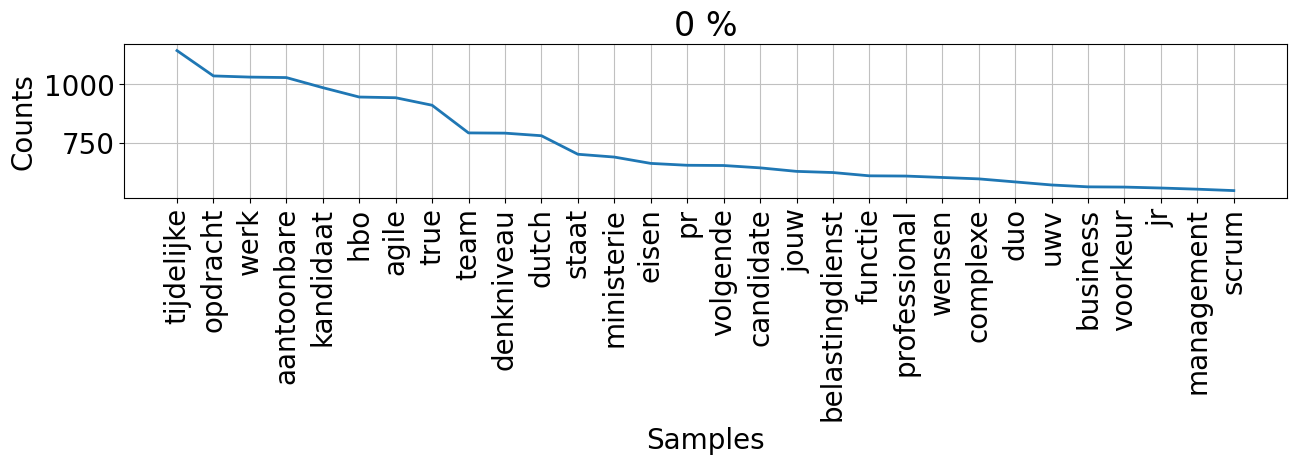

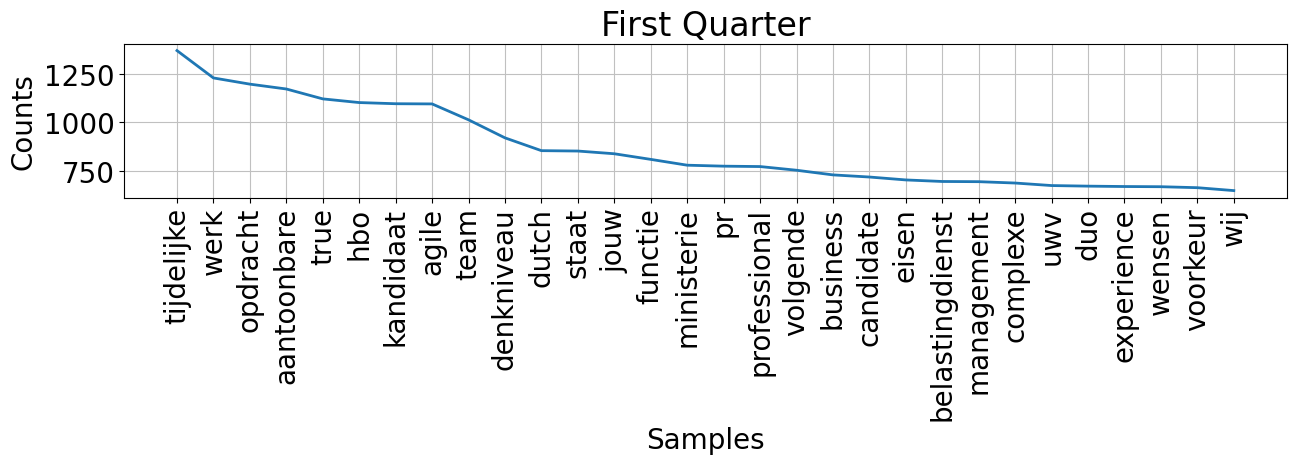

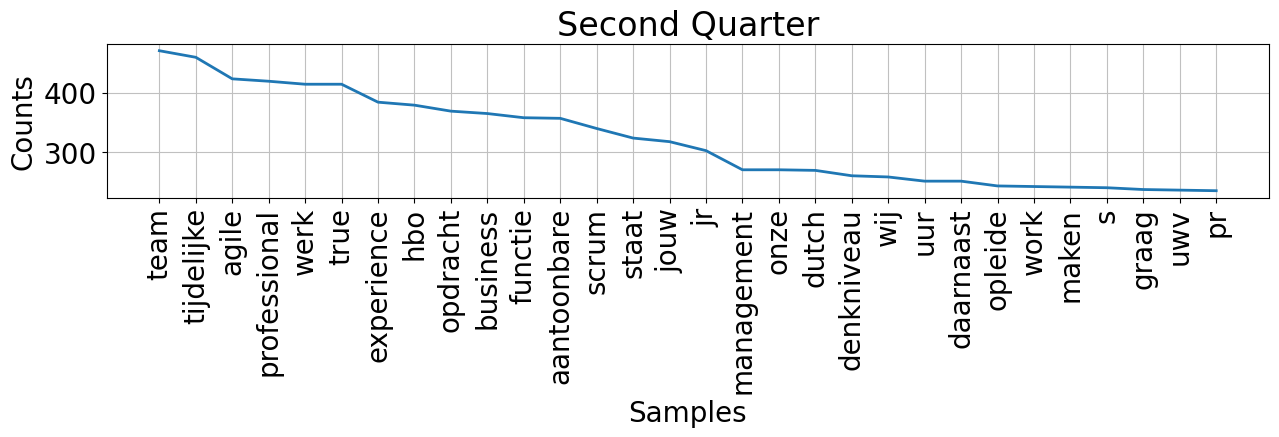

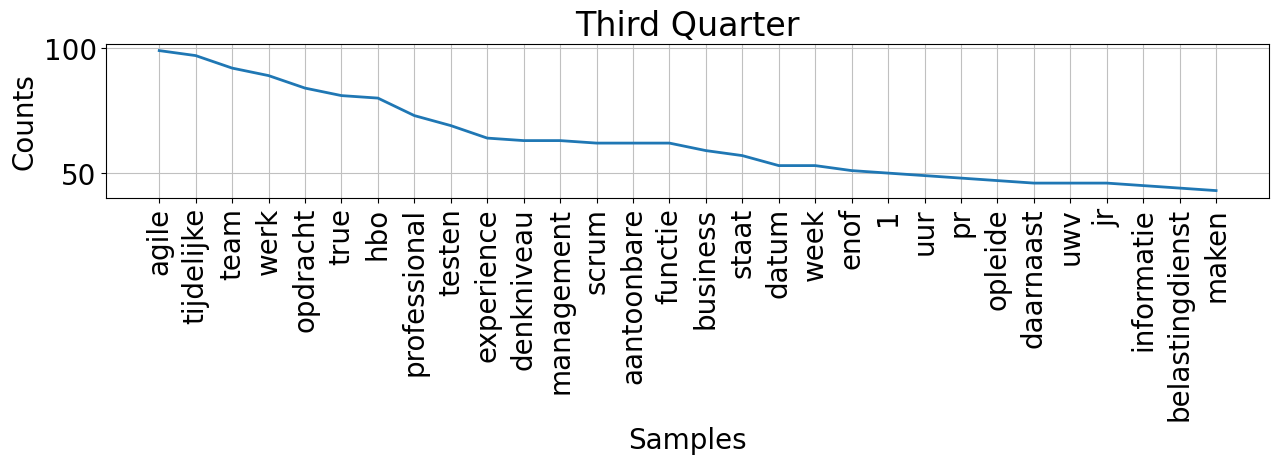

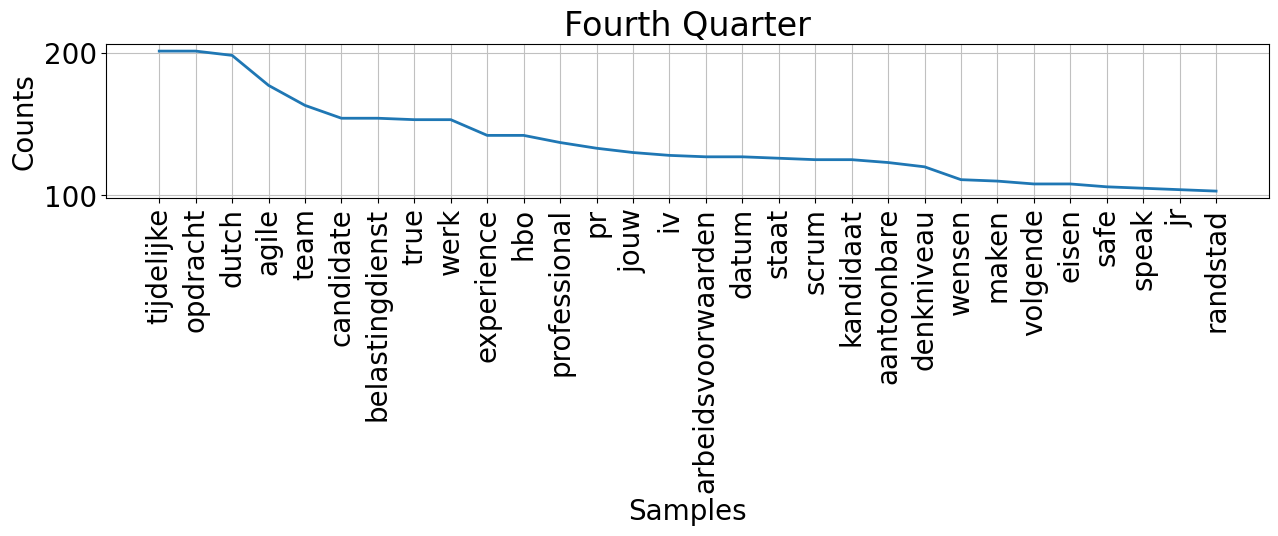

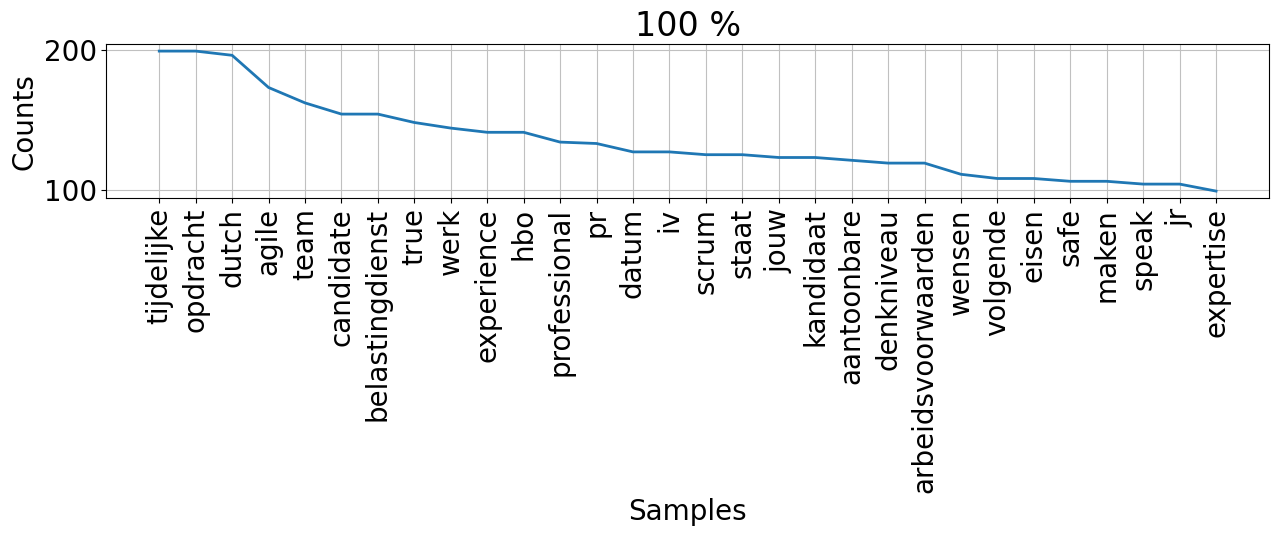

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = '20'

plt.figure(figsize=(15,2))
fd0_filtered.plot(30,  title='0 %')
plt.figure(figsize=(15,2))
fd1_filtered.plot(30,  title='First Quarter')
plt.figure(figsize=(15,2))
fd2_filtered.plot(30,  title='Second Quarter')
plt.figure(figsize=(15,2))
fd3_filtered.plot(30,  title='Third Quarter')
plt.figure(figsize=(15,2))
fd4_filtered.plot(30,  title='Fourth Quarter')
plt.figure(figsize=(15,2))
fd5_filtered.plot(30,  title='100 %')

In [52]:
total_0 = fd0_filtered.N()
total_1 = fd1_filtered.N()
# display(total_1)
total_2 = fd2_filtered.N()
total_3 = fd3_filtered.N()
# display(total_3)
total_4 = fd4_filtered.N()
# display(total_4)
total_5 = fd5_filtered.N()
# display(total_5)

# Convert to frequency proportions
fd0 = {word: count / total_0 for word, count in fd0_filtered.items()}
fd1 = {word: count / total_1 for word, count in fd1_filtered.items()}
fd2 = {word: count / total_2 for word, count in fd2_filtered.items()}
fd3 = {word: count / total_3 for word, count in fd3_filtered.items()}
fd4 = {word: count / total_4 for word, count in fd4_filtered.items()}
fd5 = {word: count / total_5 for word, count in fd5_filtered.items()}

# All unique words
all_words = set(fd0) | set(fd1) | set(fd2) | set(fd3) | set(fd4) | set(fd5)

# Build normalized DataFrame
freq_df = pd.DataFrame({
    'word': list(all_words),
    'Q0': [fd0.get(word, 0) for word in all_words],
    'Q1': [fd1.get(word, 0) for word in all_words],
    'Q2': [fd2.get(word, 0) for word in all_words],
    'Q3': [fd3.get(word, 0) for word in all_words],
    'Q4': [fd4.get(word, 0) for word in all_words],
    'Q5': [fd5.get(word, 0) for word in all_words]
})

freq_df.set_index('word', inplace=True)
freq_df['total'] = freq_df.sum(axis=1)
freq_df = freq_df.sort_values(by='total', ascending=False)

top_words = freq_df.head(10).index
top_200 = freq_df.head(200).index

pd.options.display.max_seq_items = None
print(top_200)

Index(['tijdelijke', 'opdracht', 'agile', 'werk', 'team', 'hbo', 'aantoonbare',
       'dutch', 'professional', 'experience', 'denkniveau', 'staat',
       'kandidaat', 'scrum', 'candidate', 'jouw', 'pr', 'belastingdienst',
       'business', 'functie', 'datum', 'jr', 'volgende', 'management',
       'ministerie', 'maken', 'uwv', 'eisen', 'goede', 'daarnaast', 'wensen',
       'wij', 'arbeidsvoorwaarden', 'complexe', 'jou', 'uur', 's', 'rol',
       'enof', 'expertise', 'duo', 'graag', 'voorkeur', 'onze', 'work',
       'speak', 'safe', 'testen', 'bieden', 'week', 'voldoet', 'opdrachtgever',
       'nederland', 'naast', 'tussen', 'randstad', 'ict', 'salaris', 'omgeve',
       'kunt', 'nederlandse', 'informatie', 'maand', 'communication',
       'service', 'waar', 'skill', 'applicatie', 'ontwikkelen', 'ruime',
       'false', 'gebied', 'digital', 'contract', 'open', 'omgeving', 'go',
       'basis', 'master', 'nice', 'oplossingen', 'eigen', 'design',
       'afgeronde', 'taal', 'vast', 

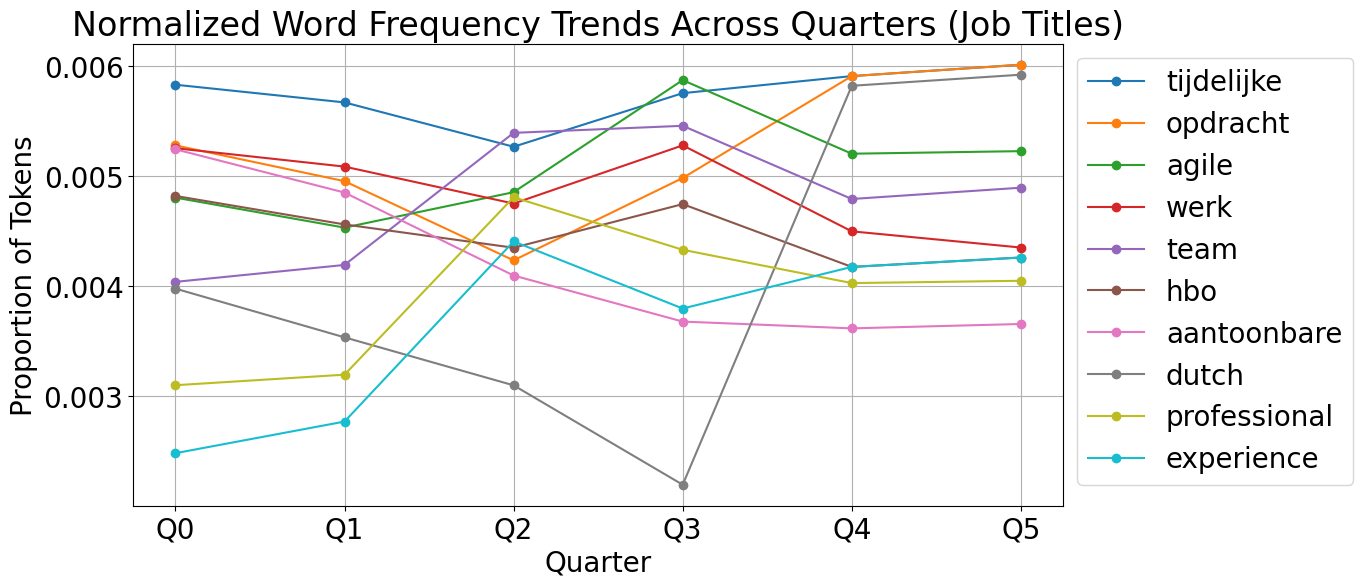

In [47]:
freq_df.loc[top_words, ['Q0','Q1', 'Q2', 'Q3', 'Q4', 'Q5']].T.plot(
    kind='line', marker='o', figsize=(12, 6)
)
plt.title("Normalized Word Frequency Trends Across Quarters (Job Titles)")
plt.xlabel("Quarter")
plt.ylabel("Proportion of Tokens")
plt.grid(True)
plt.legend(title="Word")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()